In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib


In [2]:
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df = pd.read_csv('Data/Dhaka house prices.csv')

In [4]:
df.head()

,area_type,availability,Location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,RAJUK PURBACHAL SECTOR-2,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,"Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.",4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,"Plot # 39/1 & 39/1/1, Road No.-04, Shaymoli, ...",3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Uttara,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,"Plot: 310, Road No: 10, Block: J, Bashundhara R/A",2 BHK,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 8)

In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df2 = df.drop(['area_type','balcony','availability'],axis='columns')

In [8]:
df2.head()

,Location,size,total_sqft,bath,price
0,RAJUK PURBACHAL SECTOR-2,2 BHK,1056,2.0,39.07
1,"Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.",4 Bedroom,2600,5.0,120.00
2,"Plot # 39/1 & 39/1/1, Road No.-04, Shaymoli, ...",3 BHK,1440,2.0,62.00
3,Uttara,3 BHK,1521,3.0,95.00
4,"Plot: 310, Road No: 10, Block: J, Bashundhara R/A",2 BHK,1200,2.0,51.00


In [9]:
df2.isna().sum()

Location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df2.shape

(13320, 5)

In [11]:
df3 = df2.copy()

In [12]:
df3 = df3.dropna()

In [13]:
df3.isna().sum()

Location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3.shape

(13247, 5)

In [15]:
df3.head()

,Location,size,total_sqft,bath,price
0,RAJUK PURBACHAL SECTOR-2,2 BHK,1056,2.0,39.07
1,"Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.",4 Bedroom,2600,5.0,120.00
2,"Plot # 39/1 & 39/1/1, Road No.-04, Shaymoli, ...",3 BHK,1440,2.0,62.00
3,Uttara,3 BHK,1521,3.0,95.00
4,"Plot: 310, Road No: 10, Block: J, Bashundhara R/A",2 BHK,1200,2.0,51.00


In [16]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [18]:
df3.head()

,Location,size,total_sqft,bath,price,bhk
0,RAJUK PURBACHAL SECTOR-2,2 BHK,1056,2.0,39.07,2
1,"Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.",4 Bedroom,2600,5.0,120.00,4
2,"Plot # 39/1 & 39/1/1, Road No.-04, Shaymoli, ...",3 BHK,1440,2.0,62.00,3
3,Uttara,3 BHK,1521,3.0,95.00,3
4,"Plot: 310, Road No: 10, Block: J, Bashundhara R/A",2 BHK,1200,2.0,51.00,2


In [19]:
df3['bhk'].unique

<bound method Series.unique of 0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13247, dtype: int64>

In [20]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df3[~df3['total_sqft'].apply(is_float)].head()

,Location,size,total_sqft,bath,price,bhk
30,Near Square Hospital,4 BHK,2100 - 2850,4.0,186.000,4
122,Uttara,4 BHK,3067 - 8156,4.0,477.000,4
137,Bashundhara,2 BHK,1042 - 1105,2.0,54.005,2
165,"House-34, Main Road, Block-B, Aftabnagar, Badd...",2 BHK,1145 - 1340,2.0,43.490,2
188,Uttara,2 BHK,1015 - 1540,2.0,56.800,2


In [23]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
convert_sqft_to_num('2155')

2155.0

In [25]:
convert_sqft_to_num('1120 - 1145')

1132.5

In [26]:
convert_sqft_to_num('1000Sq. Meter')

In [27]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,Location,size,total_sqft,bath,price,bhk
0,RAJUK PURBACHAL SECTOR-2,2 BHK,1056.0,2.0,39.07,2
1,"Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.",4 Bedroom,2600.0,5.0,120.00,4


In [28]:
df4.loc[30]

Location      Near Square Hospital
size                         4 BHK
total_sqft                  2475.0
bath                           4.0
price                        186.0
bhk                              4
Name: 30, dtype: object

In [29]:
(2100+2850)/2

2475.0

In [30]:
df4

,Location,size,total_sqft,bath,price,bhk
0,RAJUK PURBACHAL SECTOR-2,2 BHK,1056.0,2.0,39.07,2
1,"Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.",4 Bedroom,2600.0,5.0,120.00,4
2,"Plot # 39/1 & 39/1/1, Road No.-04, Shaymoli, ...",3 BHK,1440.0,2.0,62.00,3
3,Uttara,3 BHK,1521.0,3.0,95.00,3
4,"Plot: 310, Road No: 10, Block: J, Bashundhara R/A",2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Bashundhara,5 Bedroom,3453.0,4.0,231.00,5
13316,Bashundhara,4 BHK,3600.0,5.0,400.00,4
13317,Uttara,2 BHK,1141.0,2.0,60.00,2
13318,Uttara,4 BHK,4689.0,4.0,488.00,4


In [31]:
 df5 = df4.copy()

In [32]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

In [33]:
df5.head()

,Location,size,total_sqft,bath,price,bhk,price_per_sqft
0,RAJUK PURBACHAL SECTOR-2,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,"Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.",4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,"Plot # 39/1 & 39/1/1, Road No.-04, Shaymoli, ...",3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Uttara,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,"Plot: 310, Road No: 10, Block: J, Bashundhara R/A",2 BHK,1200.0,2.0,51.00,2,4250.000000


In [34]:
len(df5['Location'].unique())

419

In [35]:
df5.Location = df5.Location.apply(lambda x: x.strip())

In [36]:
Location_stats = df5['Location'].value_counts(ascending=False)

In [37]:
Location_stats

Uttara                                                                2041
Bashundhara                                                            661
Gulshan                                                                494
road-15,house-37,block-d,secation-12                                   433
Banani                                                                 403
                                                                      ... 
Senpara Parbata, Mirpur 10                                               1
Uttara Kamar Para                                                        1
Lalmatia , Dhaka 1209                                                    1
House -61, Road No-04, South Mollartake, Dokkhan khan, Dhaka-1230.       1
DOHS MIRPUR                                                              1
Name: Location, Length: 419, dtype: int64

In [38]:
len(Location_stats)

419

In [39]:
len(Location_stats[Location_stats>10])

153

In [40]:
Location_stats_less_than_10 = Location_stats[Location_stats<=10]

In [41]:
Location_stats_less_than_10

Dhanmondi                                                                 10
south mollartak borttola,ashkona beside hajjcamp civil aviation colony     9
Plot # 35, Road # 1, Dhanmondi R/A, Dhaka-1209                             9
109/5/B,west Dhanmondi                                                     9
ULUDAHA SOBUR GONI MARKET,BAUNIYA, TURAG                                   9
                                                                          ..
Senpara Parbata, Mirpur 10                                                 1
Uttara Kamar Para                                                          1
Lalmatia , Dhaka 1209                                                      1
House -61, Road No-04, South Mollartake, Dokkhan khan, Dhaka-1230.         1
DOHS MIRPUR                                                                1
Name: Location, Length: 266, dtype: int64

In [42]:
len(df5.Location.unique())

419

In [43]:
df5.Location = df5.Location.apply(lambda x: 'other' if x in Location_stats_less_than_10 else x)

In [44]:
len(df5.Location.unique())

154

In [45]:
df5.head(10)

,Location,size,total_sqft,bath,price,bhk,price_per_sqft
0,RAJUK PURBACHAL SECTOR-2,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,"Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.",4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,"Plot # 39/1 & 39/1/1, Road No.-04, Shaymoli, ...",3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Uttara,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,"Plot: 310, Road No: 10, Block: J, Bashundhara R/A",2 BHK,1200.0,2.0,51.00,2,4250.000000
5,"60 feet,Bareak mollar mor,Mirpur-02",2 BHK,1170.0,2.0,38.00,2,3247.863248
6,"Basundhara R/A, Block# B, Dhaka",4 BHK,2732.0,4.0,204.00,4,7467.057101
7,"Plot # 190, Road # 2, New DOHS, Mohakhali, Dhaka.",4 BHK,3300.0,4.0,600.00,4,18181.818182
8,BasundaraR/A,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,"Address: Holding # 465 , Senpara Porbota, Mirp...",6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [46]:
df5[df5.total_sqft/df5.bhk<300].head()

,Location,size,total_sqft,bath,price,bhk,price_per_sqft
9,"Address: Holding # 465 , Senpara Porbota, Mirp...",6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Adabor Road 1,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,"aftabnagar,House #14,Block#B,Road #1",6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,"Bashundhara R/A , Block-D, Road-10, Plot-315-3...",8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,"road-15,house-37,block-d,secation-12",3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [47]:
df5.shape

(13201, 7)

In [48]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]

In [49]:
df6.shape

(12457, 7)

In [50]:
df6.price_per_sqft.describe()

count     12457.000000
mean       6308.427888
std        4167.968413
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [51]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10809, 7)

In [52]:
df7.price_per_sqft.describe()

count    10809.000000
mean      5390.404792
std       1624.869245
min       1379.310345
25%       4197.761194
50%       5111.111111
75%       6329.113924
max      27083.333333
Name: price_per_sqft, dtype: float64

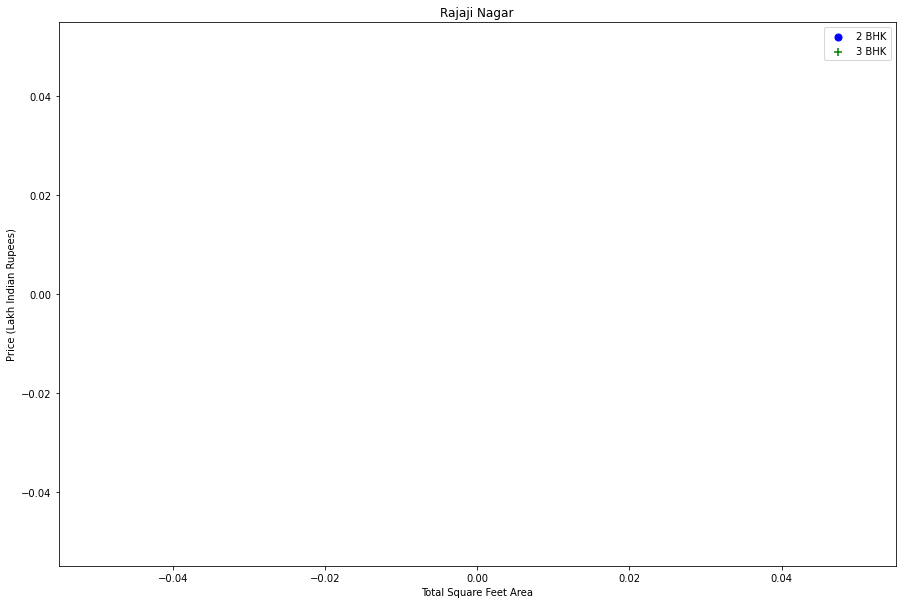

In [53]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.Location==location) & (df.bhk==2)]
    bhk3 = df[(df.Location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [54]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7232, 7)

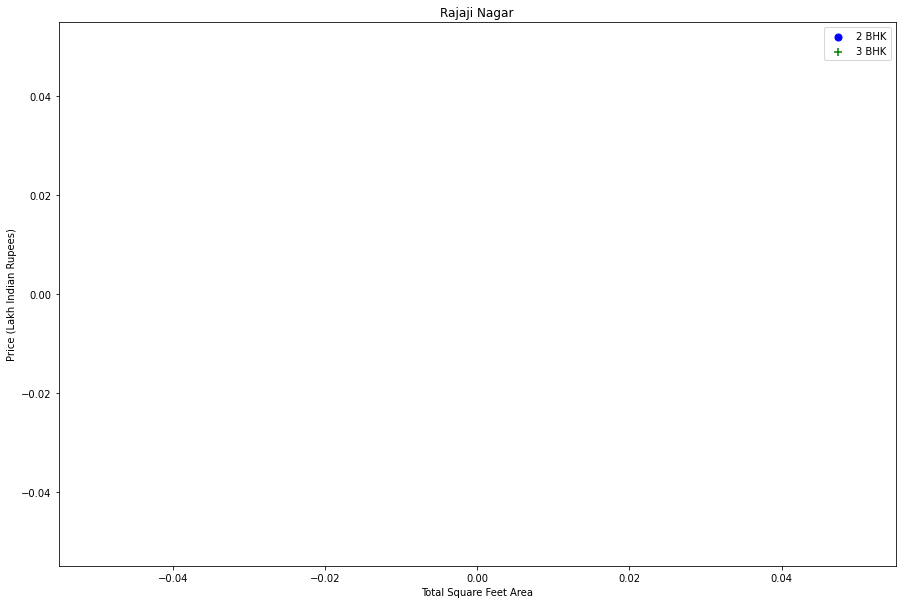

In [55]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

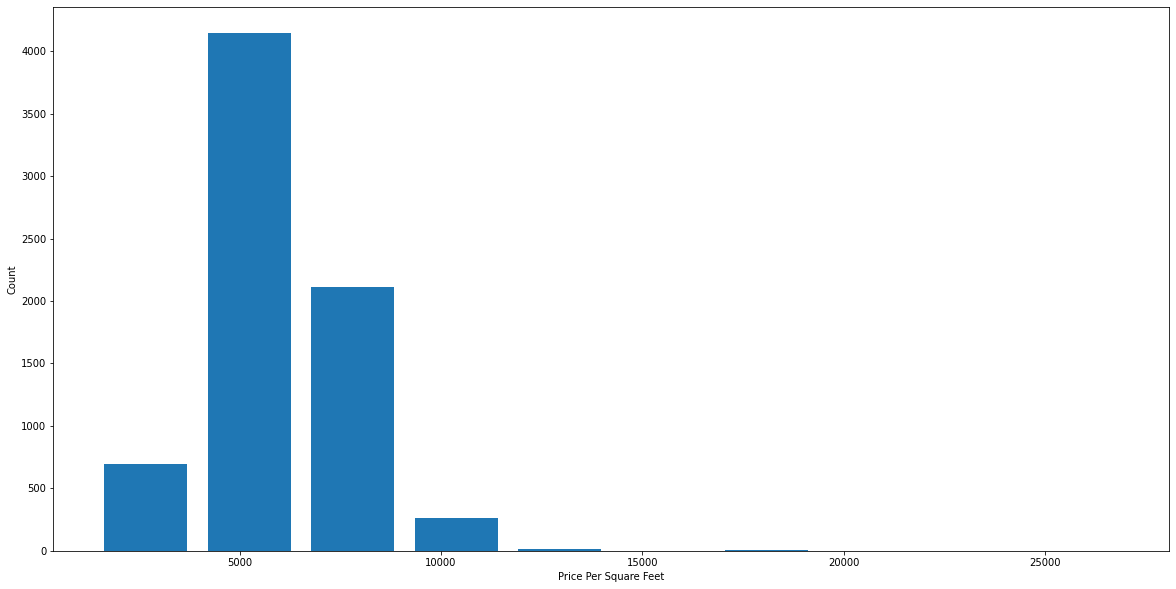

In [56]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [57]:
df8.bath.unique()

array([ 3.,  1.,  2.,  4.,  6.,  5.,  7.,  8.,  9., 12., 16., 10., 13.])

In [58]:
df8[df8.bath>10]

,Location,size,total_sqft,bath,price,bhk,price_per_sqft
4091,Gulshan north,10 BHK,4000.0,12.0,160.0,10,4000.000000
4607,"House-34, Main Road, Block-B, Aftabnagar, Badd...",16 BHK,10000.0,16.0,550.0,16,5500.000000
9803,"road-08,house-141,block-E,secation-11",13 BHK,5425.0,13.0,275.0,13,5069.124424
10451,"road-2,house-24,block-b,secation-12",10 BHK,12000.0,12.0,525.0,10,4375.000000


Text(0, 0.5, 'Count')

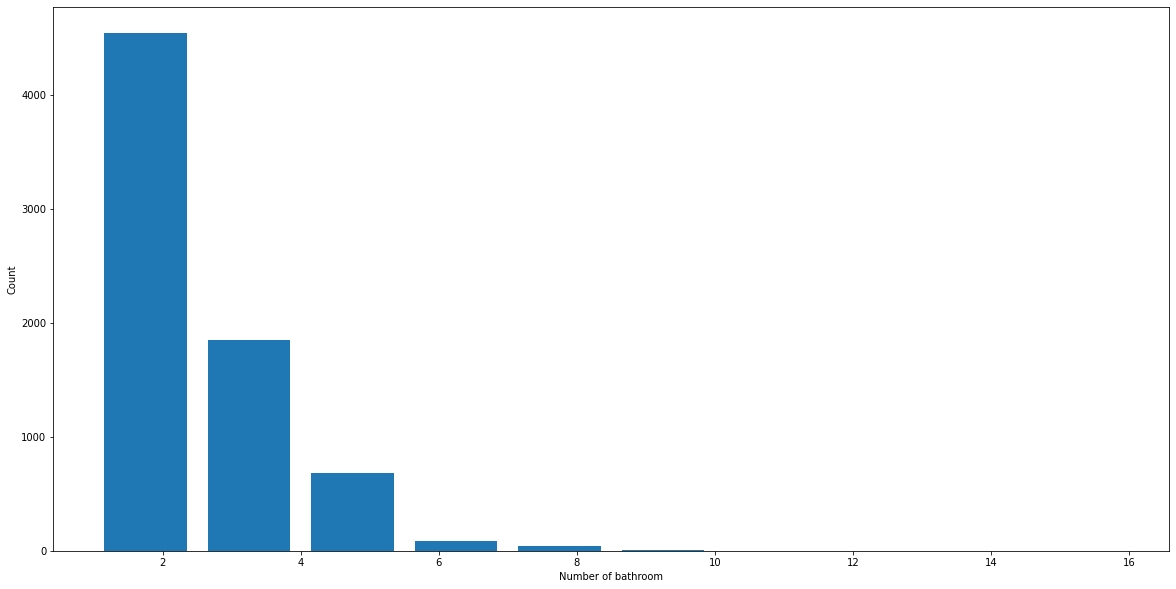

In [59]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathroom")
plt.ylabel("Count")

In [60]:
df8[df8.bath>df8.bhk+2]

,Location,size,total_sqft,bath,price,bhk,price_per_sqft
1797,Bashundhara,6 BHK,11338.0,9.0,1000.0,6,8819.897689
4226,Gulshan2 Dhaka 1212 Residential property,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5733,"Plot: 310, Road No: 10, Block: J, Bashundhara R/A",3 BHK,1806.0,6.0,116.0,3,6423.034330


In [61]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7158, 7)

In [62]:
df9 = df9.drop(['size','price_per_sqft'],axis='columns')

In [63]:
df9.head(2)

,Location,total_sqft,bath,price,bhk
0,"1, Central Bashabo.",1460.0,3.0,73.0,3
1,"1, Central Bashabo.",469.0,1.0,25.0,1


In [64]:
dummies = pd.get_dummies(df9.Location)
dummies.head(3)

,"1, Central Bashabo.",10/3/3 Wasa road basabo landscape nebula,"109/5/B, West Dhanmondi, Dhaka.","1200 East Shewrapara, Dhaka - 1216","1200 East Shewrapara, Kafrul , Dhaka - 1216","1338 East shewrapara,kafrul dhaka' 1216",23/c zikatola dhaka 1209,"238/1 Kawlar Bazar, Dakhinkhan, Dhaka1229","247 Free School Street, Kathal Bagan, Dhaka.","42/F Indira Road, Forum Apartment",...,"road-12,house-21,block-d,section-12","road-15,house-37,block-d,secation-12","road-15,house-37,block-d,section-12","road-2,house-24,block-b,secation-12","road-2,house-24,block-b,section-12","road-H/6,plot-H/25,block-h,Eastran housing","road-N/6,house-H/25,block-H,Eastern Housing",savar,shapno nagar(MIRPUR DOHS)UCB CHATTAR,suvastu nazar vally
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df10 = pd.concat([df9,dummies.drop('suvastu nazar vally',axis='columns')],axis='columns')

In [66]:
df10.shape

(7158, 158)

In [67]:
df10.head()

,Location,total_sqft,bath,price,bhk,"1, Central Bashabo.",10/3/3 Wasa road basabo landscape nebula,"109/5/B, West Dhanmondi, Dhaka.","1200 East Shewrapara, Dhaka - 1216","1200 East Shewrapara, Kafrul , Dhaka - 1216",...,"road-12,house-21,block-d,secation-12","road-12,house-21,block-d,section-12","road-15,house-37,block-d,secation-12","road-15,house-37,block-d,section-12","road-2,house-24,block-b,secation-12","road-2,house-24,block-b,section-12","road-H/6,plot-H/25,block-h,Eastran housing","road-N/6,house-H/25,block-H,Eastern Housing",savar,shapno nagar(MIRPUR DOHS)UCB CHATTAR
0,"1, Central Bashabo.",1460.0,3.0,73.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"1, Central Bashabo.",469.0,1.0,25.00,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"1, Central Bashabo.",1141.0,2.0,38.55,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"1, Central Bashabo.",1750.0,3.0,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"1, Central Bashabo.",1200.0,2.0,52.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df11 = df10.drop('Location',axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk,"1, Central Bashabo.",10/3/3 Wasa road basabo landscape nebula,"109/5/B, West Dhanmondi, Dhaka.","1200 East Shewrapara, Dhaka - 1216","1200 East Shewrapara, Kafrul , Dhaka - 1216","1338 East shewrapara,kafrul dhaka' 1216",...,"road-12,house-21,block-d,secation-12","road-12,house-21,block-d,section-12","road-15,house-37,block-d,secation-12","road-15,house-37,block-d,section-12","road-2,house-24,block-b,secation-12","road-2,house-24,block-b,section-12","road-H/6,plot-H/25,block-h,Eastran housing","road-N/6,house-H/25,block-H,Eastern Housing",savar,shapno nagar(MIRPUR DOHS)UCB CHATTAR
0,1460.0,3.0,73.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,469.0,1.0,25.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df11.shape

(7158, 157)

In [70]:
X = df11.drop('price',axis='columns')

In [71]:
X.head(3)

,total_sqft,bath,bhk,"1, Central Bashabo.",10/3/3 Wasa road basabo landscape nebula,"109/5/B, West Dhanmondi, Dhaka.","1200 East Shewrapara, Dhaka - 1216","1200 East Shewrapara, Kafrul , Dhaka - 1216","1338 East shewrapara,kafrul dhaka' 1216",23/c zikatola dhaka 1209,...,"road-12,house-21,block-d,secation-12","road-12,house-21,block-d,section-12","road-15,house-37,block-d,secation-12","road-15,house-37,block-d,section-12","road-2,house-24,block-b,secation-12","road-2,house-24,block-b,section-12","road-H/6,plot-H/25,block-h,Eastran housing","road-N/6,house-H/25,block-H,Eastern Housing",savar,shapno nagar(MIRPUR DOHS)UCB CHATTAR
0,1460.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,469.0,1.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1141.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
X.shape

(7158, 156)

In [73]:
y = df11.price

In [74]:
y.head()

0     73.00
1     25.00
2     38.55
4    130.00
5     52.00
Name: price, dtype: float64

In [75]:
y.shape

(7158,)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lr_clf = LinearRegression()
lr_clf.fit(X_train.values,y_train.values)
lr_clf.score(X_test.values,y_test.values)

0.9026737149042869

In [80]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.85196433, 0.84274437, 0.86185596, 0.87128064, 0.81465298])

In [81]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

mod

,model,best_score,best_params
0,linear_regression,0.848500,{'normalize': True}
1,lasso,0.844590,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.800903,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [82]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1, Central Bashabo.',
       '10/3/3 Wasa road basabo landscape nebula',
       '109/5/B, West Dhanmondi, Dhaka.',
       '1200 East Shewrapara,  Dhaka - 1216',
       '1200 East Shewrapara, Kafrul , Dhaka - 1216',
       '1338 East shewrapara,kafrul dhaka' 1216', '23/c zikatola dhaka 1209',
       ...
       'road-12,house-21,block-d,secation-12',
       'road-12,house-21,block-d,section-12',
       'road-15,house-37,block-d,secation-12',
       'road-15,house-37,block-d,section-12',
       'road-2,house-24,block-b,secation-12',
       'road-2,house-24,block-b,section-12',
       'road-H/6,plot-H/25,block-h,Eastran housing',
       'road-N/6,house-H/25,block-H,Eastern Housing', 'savar',
       'shapno nagar(MIRPUR DOHS)UCB CHATTAR'],
      dtype='object', length=156)

In [83]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [84]:
predict_price('savar',1000, 2,3)

55.94780550406152

In [85]:
predict_price('Uttara',1100, 3, 1)

76.9734271885332

In [86]:
predict_price("1338 East shewrapara,kafrul dhaka' 1216",1600, 2, 3)

94.8613077112459

In [87]:
predict_price('Uttara',1800, 3, 3)

121.84364455973542

In [90]:
import pickle
with open('Dhaka_home_prices_model','wb') as f:
    pickle.dump(lr_clf,f)

In [92]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json",'w') as f:
    f.write(json.dumps(columns))